In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org


Looking in indexes: https://download.pytorch.org


In [ ]:
import torch
print(torch.__version__)

2.9.0+cu128


In [ ]:
if torch.cuda.is_available():
    print("CUDA is available.")
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
  print("GPU not available. Using CPU.")

CUDA is available.
Using GPU: Tesla T4


Create Tensor

In [ ]:
a = torch.empty(2,3)
#ML

In [ ]:
type(a)

torch.Tensor

In [ ]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [ ]:
torch.ones(2,4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.rand(2,4)

tensor([[0.3520, 0.2828, 0.2420, 0.4928],
        [0.5772, 0.3771, 0.2440, 0.8994]])

In [ ]:
torch.manual_seed(100)
torch.rand(2,3)

tensor([[0.1117, 0.8158, 0.2626],
        [0.4839, 0.6765, 0.7539]])

In [ ]:
a.dtype

torch.float32

In [ ]:
torch.tensor([1,2,3], dtype=torch.float)

tensor([1., 2., 3.])

In [ ]:
c = torch.tensor([-1,2,3])


In [ ]:
torch.abs(c)

tensor([1, 2, 3])

In [ ]:
torch.neg(c)

tensor([ 1, -2, -3])

In [ ]:
torch.inverse(c)

RuntimeError: linalg.inv: The input tensor A must have at least 2 dimensions.

AutoGrad////////////////////////////////////////////////////////////////////////

In [ ]:
import torch
x = torch.tensor(3.0, requires_grad=True)
x

In [ ]:
y = x**2
y

In [ ]:
y.backward()


In [ ]:
x.grad

In [ ]:
m = torch.tensor(4.0, requires_grad=True)
m


In [ ]:
n  = m**2

In [ ]:
o = torch.sin(n)

In [ ]:
m

In [ ]:
n

In [ ]:
o

In [ ]:
o.backward()

In [ ]:
m.grad

In [ ]:
n.grad

In [ ]:
o.grad

▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪▪

In [ ]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

w = torch.tensor(1.0)
b = torch.tensor(0.0)

In [ ]:
#binary class entropy
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-7
  prediction = torch.clamp(prediction, epsilon, 1-epsilon)
  return -(target * torch.log(prediction) + (1 - target) * torch.log(1-prediction))


In [ ]:
z = w * x * b
y_pred = torch.sigmoid(z)
loss = binary_cross_entropy_loss(y_pred, y)
loss


In [ ]:
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [ ]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Now using reqgrad

In [ ]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [ ]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [ ]:
w

In [ ]:
x

In [ ]:
z = w*x+b
z

In [ ]:
y_pred = torch.sigmoid(z)
y_pred

In [ ]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

In [ ]:
loss.backward()

In [ ]:
print(w.grad)
print(b.grad)

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

In [ ]:
y = (x**2).mean()
y

In [ ]:
y.backward()

In [ ]:
y

In [ ]:
x.grad

In [ ]:
x.grad.zero_()

In [ ]:
x.grad

In [ ]:
@@@@@@@@@@@@@@@@Training Pipeline

In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()


In [ ]:
df.shape

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [ ]:
df.head()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:,0], test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test  = encoder.transform(y_test)

In [ ]:
y_train

In [ ]:
y_test

In [ ]:
x_train_tensor = torch.from_numpy(x_train)
x_test_tensor = torch.from_numpy(x_test)
y_train_tensor = torch.from_numpy(x_train)
y_test_tensor = torch.from_numpy(x_train)

In [ ]:
x_train_tensor.shape

In [ ]:
y_test_tensor.shape

Defining the model

In [ ]:
class MySimpleNN():

  def __init__(self, x):
    self.weights = torch.rand(x.shape[1], 1, dtype=torch.float64,requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, x):
    z = torch.matmul(x, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1-epsilon)

    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1-y_pred)).mean()
    return loss

Parameters

In [ ]:
learning_rate = 0.1
epochs = 25

Training Pipeline

In [ ]:
#create model
model = MySimpleNN(x_train_tensor)
for epoch in range(epochs):
  y_pred = model.forward(x_train_tensor)
  loss = model.loss_function(y_pred, y_train_tensor)

  loss.backward()

  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  model.weights.grad.zero_()
  model.bias.grad.zero_()

  print(f"Epoch: {epoch+1}, LOSS: {loss.item()}")

AttributeError: 'MySimpleNN' object has no attribute 'loss_function'

NN Module

In [ ]:
import torch
import torch.nn as nn


In [ ]:
class Model(nn.Module):
  def __init__(self, num_features):
   super().__init__()
   self.linear1 = nn.Linear(num_features, 3)
   self.relu = nn.ReLU()
   self.linear2 = nn.Linear(3,1)
   self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)
    return out



In [ ]:
features  = torch.rand(10, 5)

model = Model(features.shape[1])
model(features)


In [ ]:
model.linear1.bias

In [ ]:
model.linear2.weight

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model, input_size=(10, 5))

Same using Sequential network

In [ ]:
class Model(nn.Module):
  def __init__(self, num_features):
   super().__init__()
   self.network = nn.Sequential(
          nn.Linear(num_features, 3),
          nn.ReLU(),
          nn.Linear(3,1),
          nn.Sigmoid(),
        )

  def forward(self, features):
    out = self.network(features)
    return out



In [ ]:
features  = torch.rand(10, 5)

model = Model(features.shape[1])
model(features)


Define the model (Improved)

In [ ]:
import torch.nn as nn
class MySimpleNN(nn.Module):
  def __init__(self, num_features):
    super().__init()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    out = self.linear(features)
    out = self.sigmoid(out)

    return out

  def loss_function(self, y_pred, y):
    epilson = 1e-7
    y_pred = torch.clamp(y_pred, epilson, 1-epilson)

    #calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_pred)).mean





///////////////////////////////////////////////////////////////////////////////

In [ ]:
x_train_tensor = torch.from_numpy(x_train.astype(np.float32))
x_test_tensor = torch.from_numpy(x_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [ ]:
loss_function = nn.BCELoss()


In [ ]:
print(type(loss_function))

<class 'torch.nn.modules.loss.BCELoss'>


In [ ]:
model = MySimpleNN(x_train_tensor.shape[1])


In [ ]:
learning_rate = 0.1
epochs = 5

In [ ]:
x_train_tensor = x_train_tensor.float()
y_train_tensor = y_train_tensor.float()

model = MySimpleNN(x_train_tensor.shape[1])

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(epochs):

    y_pred = model(x_train_tensor)

    loss = loss_function(y_pred, y_train_tensor.view(-1,1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss {loss.item()}")


Epoch 1, Loss 0.7012251019477844
Epoch 2, Loss 0.5449962615966797
Epoch 3, Loss 0.4589287042617798
Epoch 4, Loss 0.4038788974285126
Epoch 5, Loss 0.36515113711357117


Model Evaluation

In [ ]:
# model evaluation
with torch.no_grad():
  y_pred = model.forward(x_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
  print(f'Accuracy: {accuracy.item()}')


RuntimeError: mat1 and mat2 must have the same dtype, but got Double and Float

Data Loader

In [ ]:
from sklearn.datasets import make_classification
import torch

In [ ]:
#create a synthetic classification dataset using sklearn
x, y = make_classification(
    n_samples=10,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

In [ ]:
#convert data to the tensors
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

In [ ]:
x

tensor([[ 1.0683, -0.9701],
        [-1.1402, -0.8388],
        [-2.8954,  1.9769],
        [-0.7206, -0.9606],
        [-1.9629, -0.9923],
        [-0.9382, -0.5430],
        [ 1.7273, -1.1858],
        [ 1.7774,  1.5116],
        [ 1.8997,  0.8344],
        [-0.5872, -1.9717]])

In [ ]:
y

tensor([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
x.shape

torch.Size([10, 2])

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self, index):
    return self.features[index], self.labels[index]





In [ ]:
dataset = CustomDataset(x, y)

In [ ]:
len(dataset)

10

In [ ]:
dataset[2]

(tensor([-2.8954,  1.9769]), tensor(0))

In [ ]:
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
for batch_features, batch_labels in dataloader:
  print(batch_features)
  print(batch_labels)
  print("------------------------------")

tensor([[1.8997, 0.8344],
        [1.7774, 1.5116]])
tensor([1, 1])
------------------------------
tensor([[-2.8954,  1.9769],
        [-1.9629, -0.9923]])
tensor([0, 0])
------------------------------
tensor([[-1.1402, -0.8388],
        [-0.9382, -0.5430]])
tensor([0, 1])
------------------------------
tensor([[ 1.0683, -0.9701],
        [-0.7206, -0.9606]])
tensor([1, 0])
------------------------------
tensor([[ 1.7273, -1.1858],
        [-0.5872, -1.9717]])
tensor([1, 0])
------------------------------


In [ ]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-5.56840227e-01,  4.48388596e-02, -5.71059867e-01, ...,
        -1.14620585e-01, -3.66312450e-01, -1.11954990e-01],
       [-1.25662182e+00, -5.43825342e-01, -1.23322427e+00, ...,
        -9.48245619e-01, -5.80697112e-01,  4.45575875e-02],
       [-8.30705018e-01, -8.85113148e-01, -7.84075349e-01, ...,
        -5.00168350e-01, -1.17779810e+00,  1.08903948e+00],
       ...,
       [ 4.55888950e-01, -3.37678345e-01,  4.63468812e-01, ...,
         9.98709593e-01,  1.41863837e+00,  1.11565727e+00],
       [-1.03251666e-01,  1.17406630e+00, -1.78011916e-03, ...,
         5.57952851e-01,  1.19472550e+00,  1.83433747e+00],
       [-7.62238820e-01,  1.04579705e+00, -7.37013789e-01, ...,
        -2.89550682e-01, -1.24925965e+00,  1.85099494e-01]])

In [ ]:
x_test

array([[-0.55969298,  0.15478392, -0.53266754, ..., -0.52823037,
        -0.30120303,  0.24206155],
       [-1.10171705, -0.69041876, -1.11722166, ..., -1.39861055,
        -0.345668  , -0.52453066],
       [-0.6680978 , -0.09717352, -0.69614454, ..., -0.70743078,
        -0.57752104, -0.20831137],
       ...,
       [-0.53687092, -0.07884934, -0.59830603, ..., -1.15428796,
        -0.54734839, -0.62674296],
       [ 0.85812786,  0.61975993,  0.79372537, ...,  1.2640787 ,
         0.50393048, -0.43349784],
       [ 1.82236015, -0.36516461,  1.67303347, ...,  1.07496508,
        -0.23609362,  0.27559996]])

In [ ]:
y_train

,diagnosis
200,B
110,B
388,B
56,M
143,B
...,...
510,B
350,B
11,M
501,M


In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
x_train_tensor = torch.from_numpy(x_train.astype(np.float32))
x_test_tensor = torch.from_numpy(x_test.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.astype(np.float32))

AttributeError: 'Tensor' object has no attribute 'astype'

In [ ]:
x_train.shape

torch.Size([455, 30])

In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = features
    self.labels = labels
  def __len__(self):
   return len(self.features)
  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [ ]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [ ]:
train_dataset[10]

(tensor([ 1.9222,  1.3115,  2.0900,  1.9462,  0.9812,  2.2033,  2.8017,  2.4897,
          1.2226,  0.8509,  1.9631, -0.3562,  2.8572,  1.6411, -0.2223,  0.9395,
          1.4252,  2.2895, -0.0142,  0.8461,  1.6676,  0.5810,  2.1555,  1.6382,
          0.3672,  1.0169,  1.8088,  2.1151,  0.0482,  0.7925]),
 tensor(1.))

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [ ]:
import torch.nn as nn


class MySimpleNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.linear = nn.Linear(num_features, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):

    out = self.linear(features)
    out = self.sigmoid(out)

    return out

In [ ]:
learning_rate = 0.1
epochs = 25

In [ ]:
model = MySimpleNN(x_train.shape[1])

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_function = nn.BCELoss()

In [ ]:
for epoch in range(epochs):
  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)
    loss = loss_function(y_pred, batch_labels.view(-1,1))

    optmizer.zero_grad()

    loss.backward()

    optimizer.step()
  print(f"Epoch: {epoch +1}, Loss: {loss.item()}")


Epoch: 1, Loss: 0.0
Epoch: 2, Loss: 2.2420768818069907e-28
Epoch: 3, Loss: 0.0
Epoch: 4, Loss: 0.0
Epoch: 5, Loss: 0.0
Epoch: 6, Loss: 0.0
Epoch: 7, Loss: 0.0
Epoch: 8, Loss: 0.0
Epoch: 9, Loss: 0.0
Epoch: 10, Loss: 0.0
Epoch: 11, Loss: 0.0
Epoch: 12, Loss: 0.0
Epoch: 13, Loss: 0.0
Epoch: 14, Loss: 0.0
Epoch: 15, Loss: 0.0
Epoch: 16, Loss: 0.0
Epoch: 17, Loss: 0.0
Epoch: 18, Loss: 0.0
Epoch: 19, Loss: 0.0
Epoch: 20, Loss: 0.0
Epoch: 21, Loss: 20.0
Epoch: 22, Loss: 0.0
Epoch: 23, Loss: 0.0
Epoch: 24, Loss: 0.0
Epoch: 25, Loss: 0.0


In [ ]:
# Model evaluation using test_loader
model.eval() # Set the model to evaluation mode
accuracy_list = []
with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    #Forward pass
    y_pred =  model(batch_features)
    y_pred = (y_pred > 0.8).float() # Convert probabilities to binary predictions
    #Calculate accuracy for the current batch
    batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
    accuracy_list.append(batch_accuracy)
    # Calculate overall accuracy
    overall_accuracy = sum(accuracy_list) / len(accuracy_list)
    print (f'Accuracy: {overall_accuracy:.4f}')

Accuracy: 1.0000
Accuracy: 0.9844
Accuracy: 0.9896
Accuracy: 0.9644


ANN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [ ]:
torch.manual_seed(42)


In [ ]:
df = pd.read_csv('fmnist_small.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'fmnist_small.csv'

In [ ]:
#create a 4x4 grid of images
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("first 16 images", fontsize=16)

#plot the first 16 images
for i, ax in enumerate(axes.flat):
  img = df.iloc[i, 1:].values.reshape(28, 28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label: {df.iloc[i, 0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
#train test split
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)

In [ ]:
x_train

In [ ]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [ ]:
# create train_dataset object
train_dataset = CustomDataset(x_train, y_train)

In [ ]:
len(train_dataset)

In [ ]:
train_dataset[0]

In [ ]:
test_dataset = CustomDataset(x_test, y_test)
test_dataset[0]

In [ ]:
# create train and test loader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
len(train_loader)

In [ ]:
class MyNN(nn.Module):
 def __init__(self, num_features):
  super().__init__()
  self.model = nn.Sequential(
      nn.Linear(num_features, 128),
      nn.ReLU(),
      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Linear(64, 10)
  )

 def forward(self, x):
    return self.model(x)

In [ ]:
learning_rate = 0.1
epochs = 100

In [ ]:
model = MyNN(x_train.shape[1])

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [ ]:
len(train_loader)

In [ ]:
#taining loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    #forward pass
    outputs = model(batch_features)

    #calculate loss
    loss = criterion(outputs, batch_labels)

    #back pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1}, Loss: {avg_loss}')

In [ ]:
len(train_loader)

In [ ]:
loss.item()

In [ ]:
torch.isnan(x_train).any()

In [ ]:
batch_x, batch_y = next(iter(train_loader))
print(batch_x.shape)
print(batch_y[:10])
print(batch_y.min(), batch_y.max())


In [ ]:
model.eval()

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)

#Training on CUDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")



Using device: cuda


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [ ]:

df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(1887, 785)

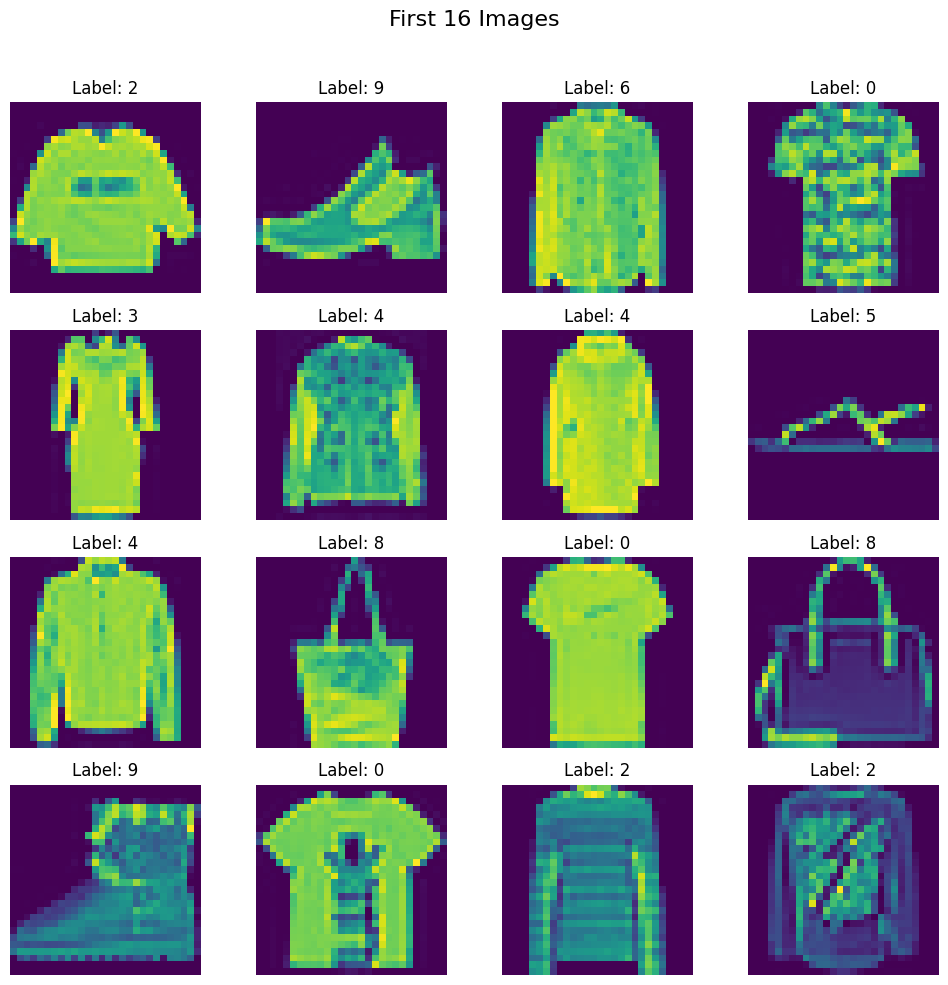

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [ ]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# create CustomDataset Class
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):

    return len(self.features)

  def __getitem__(self, index):

    return self.features[index], self.labels[index]



In [ ]:
train_dataset = CustomDataset(X_train, y_train)

In [ ]:
test_dataset = CustomDataset(X_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

In [ ]:
len(train_loader)

48

In [ ]:
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(64, 10)

    )

  def forward(self, x):

    return self.model(x)


In [ ]:
learning_rate = 0.1
epochs = 100

In [ ]:
# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate , weight_decay=1e-4)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: nan
Epoch: 2 , Loss: nan
Epoch: 3 , Loss: nan
Epoch: 4 , Loss: nan
Epoch: 5 , Loss: nan
Epoch: 6 , Loss: nan
Epoch: 7 , Loss: nan
Epoch: 8 , Loss: nan
Epoch: 9 , Loss: nan
Epoch: 10 , Loss: nan
Epoch: 11 , Loss: nan
Epoch: 12 , Loss: nan
Epoch: 13 , Loss: nan
Epoch: 14 , Loss: nan
Epoch: 15 , Loss: nan
Epoch: 16 , Loss: nan
Epoch: 17 , Loss: nan
Epoch: 18 , Loss: nan
Epoch: 19 , Loss: nan
Epoch: 20 , Loss: nan
Epoch: 21 , Loss: nan
Epoch: 22 , Loss: nan
Epoch: 23 , Loss: nan
Epoch: 24 , Loss: nan
Epoch: 25 , Loss: nan
Epoch: 26 , Loss: nan
Epoch: 27 , Loss: nan
Epoch: 28 , Loss: nan
Epoch: 29 , Loss: nan
Epoch: 30 , Loss: nan
Epoch: 31 , Loss: nan
Epoch: 32 , Loss: nan
Epoch: 33 , Loss: nan
Epoch: 34 , Loss: nan
Epoch: 35 , Loss: nan
Epoch: 36 , Loss: nan
Epoch: 37 , Loss: nan
Epoch: 38 , Loss: nan
Epoch: 39 , Loss: nan
Epoch: 40 , Loss: nan
Epoch: 41 , Loss: nan
Epoch: 42 , Loss: nan
Epoch: 43 , Loss: nan
Epoch: 44 , Loss: nan
Epoch: 45 , Loss: nan
Epoch: 46 , Loss: n

In [ ]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.11000662690523526


Hyperparameter Tuning

Optuna


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt



In [ ]:
torch.manual_seed(42)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cuda


In [ ]:
df = pd.read_csv("/content/fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(60000, 785)

In [ ]:
def objective(trail):
  return Pass
  #hyperparameter

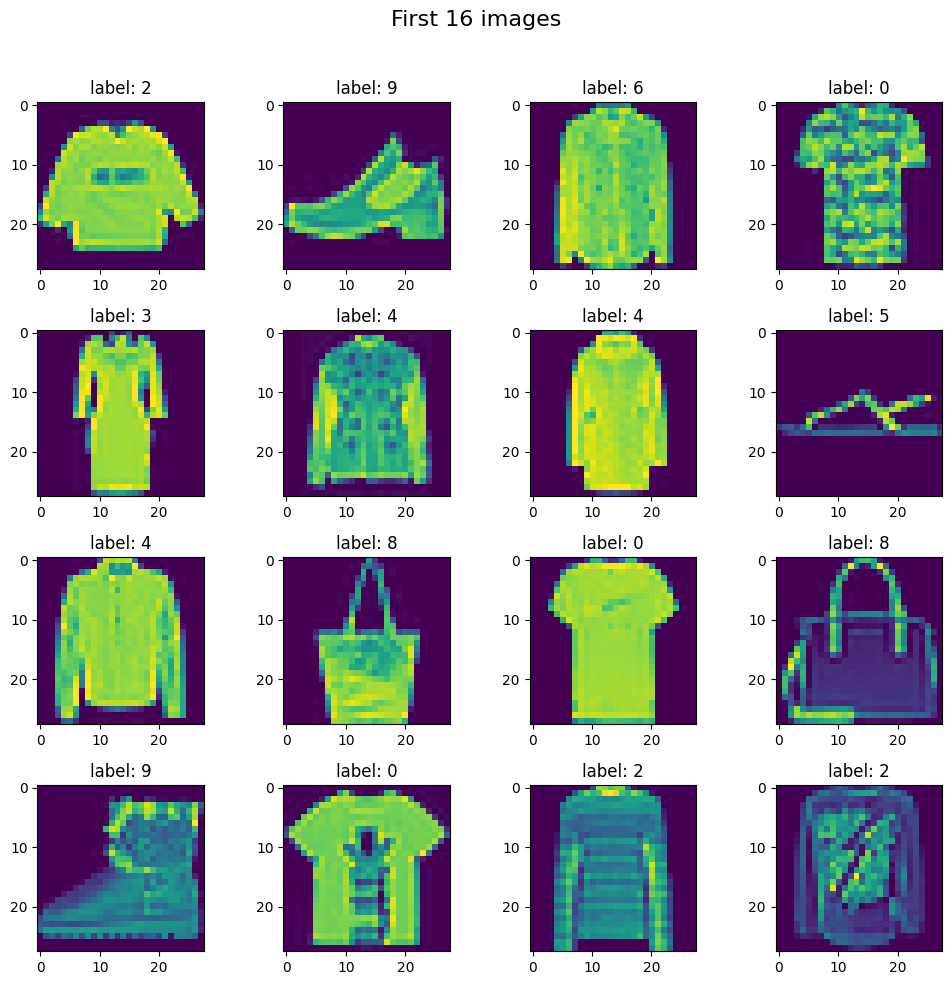

In [ ]:
fig, axes = plt.subplots(4,4, figsize=(10,10))
fig.suptitle("First 16 images", fontsize=16)
for i, ax in enumerate(axes.flat):
  image = df.iloc[i, 1:].values.reshape(28,28)
  ax.imshow(image)
  ax.set_title(f"label: {df.iloc[i, 0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [ ]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

array([2, 9, 6, ..., 8, 8, 7])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)


  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]






In [ ]:
train_dataset = CustomDataset(x_train, y_train)
test_dataset = CustomDataset(x_test, y_test)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, pin_memory=True)

In [ ]:
len(train_loader)

1500

In [ ]:
len(test_loader)

375

In [ ]:
class MyNN(nn.Module):
  def __init__(self, input_dim, output_dim, num_hidden_layers, neurons_per_layers):
    super().__init_()

    layers = []

    for i in range(num_hidden_layers):
      layers.append(nn.Linear(input_dim, neurons_per_layers))
      layers.append(nn.BatchNorm1d(neurons_per_layers))
      layers.append(nn.ReLU())
      layers.append(nn.Dropout(p=0.5))
      input_dim = neurons_per_layers

    layers.append(nn.Linear(neurons_per_layers, output_dim))
    self.model = nn.Sequential(*layers)

  def forward(self, x):
    return self.model(x)


In [ ]:
def objective(trail):
  num_hidden_layers = trail.suggest_int("num_hidden_layers", 1, 5)
  neurons_per_layers = trail.suggest_int("neurons_per_layers", 8, 128, step=8)

  input_dim = 728
  output_dim = 10

  model = MyNN(input_dim, output_dim, neurons_per_layers)
  model.to(device)

  learning_rate = 0.01
  epochs = 100

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

  for epoch in  range(epochs):
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
      batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

      outputs = model(batch_features)

      loss = criterion(outputs, batch_labels)

      optimizer.zero_grad()
      loss.backward()

      optimizer.step()

      model.eval()

      total = 0
      correct = 0

      with torch.no_grad():
        for batch_features, batch_labels in test_loader:
          batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

          outputs = model(batch_features)

          _, predicted = torch.max(outputs, 1)

          total = total + batch_labels.shape[0]

          correct = correct + (predicted == batch_labels).sum().item()
        accuracy = correct/total

    return accuracy



CNN

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [6]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'fashion-mnist_train.csv'

In [ ]:
df.shape

In [ ]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [5]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

NameError: name 'df' is not defined

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0

NameError: name 'X_train' is not defined

In [9]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1,28,28)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [10]:
train_dataset = CustomDataset(X_train, y_train)

NameError: name 'X_train' is not defined

In [11]:
test_dataset = CustomDataset(X_test, y_test)

NameError: name 'X_test' is not defined

In [12]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

NameError: name 'train_dataset' is not defined

In [13]:
class MyNN(nn.Module):
    def __init__(self, input_features):
        super().__init__()

        self.features = nn.Sequential(
            nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)

        return x

In [14]:
learning_rate = 0.01
epochs = 100

In [15]:
model = MyNN(1)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

NameError: name 'device' is not defined

In [16]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


NameError: name 'train_loader' is not defined

In [17]:
model.eval()

MyNN(
  (features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (5): ReLU()
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3136, out_features=128, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Dropout(p=0.4, inplace=False)
    (7): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [18]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

NameError: name 'test_loader' is not defined

In [19]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

NameError: name 'train_loader' is not defined